   # Obesity Classification

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    classification_report
)

### Loading Data


In [2]:
df=pd.read_csv('data\Obesity Classification.csv')

### Data Overview

In [3]:
df

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...,...
995,18,Male,155.588674,64.103182,26.480345,4,Overweight
996,35,Female,165.076490,97.639771,35.830783,1,Obese
997,49,Female,156.570956,78.804284,32.146036,1,Obese
998,64,Male,164.192222,57.978115,21.505965,4,Normal weight


In [4]:
df.shape

(1000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

In [ ]:
df.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [9]:
df['ObesityCategory'].unique()

array(['Normal weight', 'Obese', 'Overweight', 'Underweight'],
      dtype=object)

### EDA

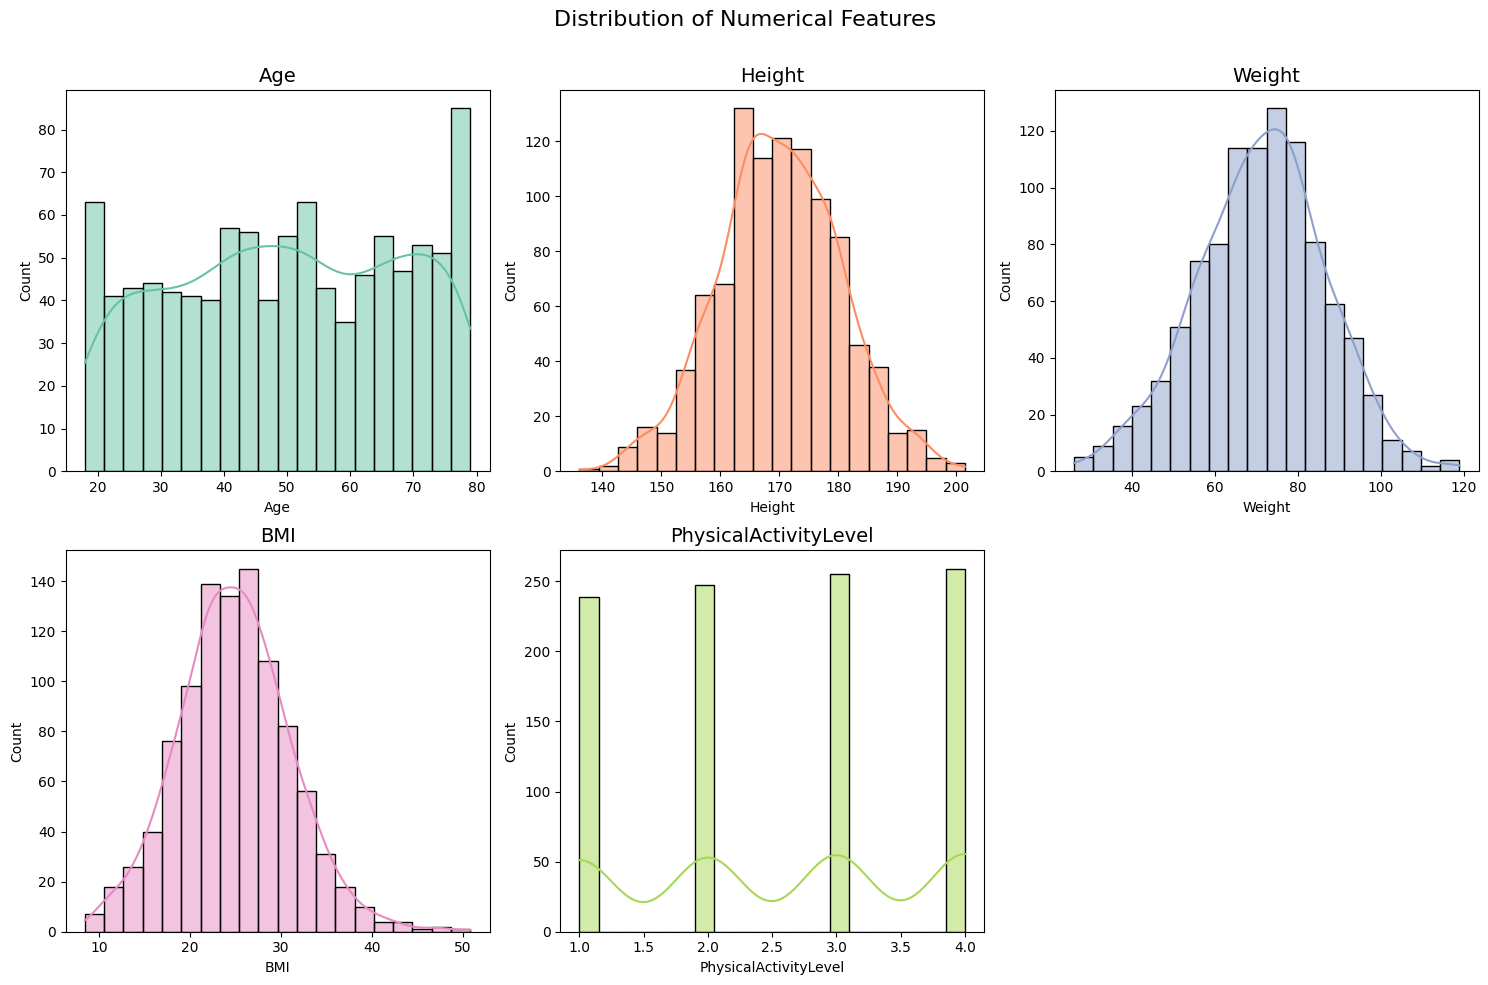

In [10]:
numerical_cols = ['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color=sns.color_palette("Set2")[i-1], bins=20)
    plt.title(f'{col}', fontsize=14)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title spacing
plt.show()

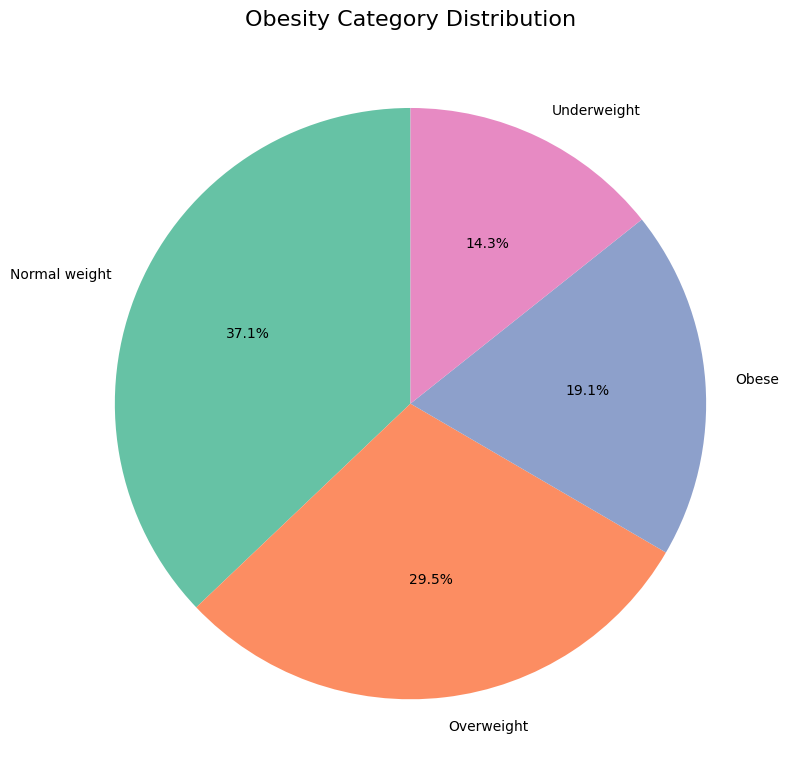

In [11]:
# Obesity Category distribution pie chart
category_counts = df['ObesityCategory'].value_counts()

labels = category_counts.index
sizes = category_counts.values

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(labels)))
ax.set_title('Obesity Category Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is circular.
plt.tight_layout()
plt.show()


C:\Users\sara\AppData\Local\Temp\ipykernel_16904\2899899777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


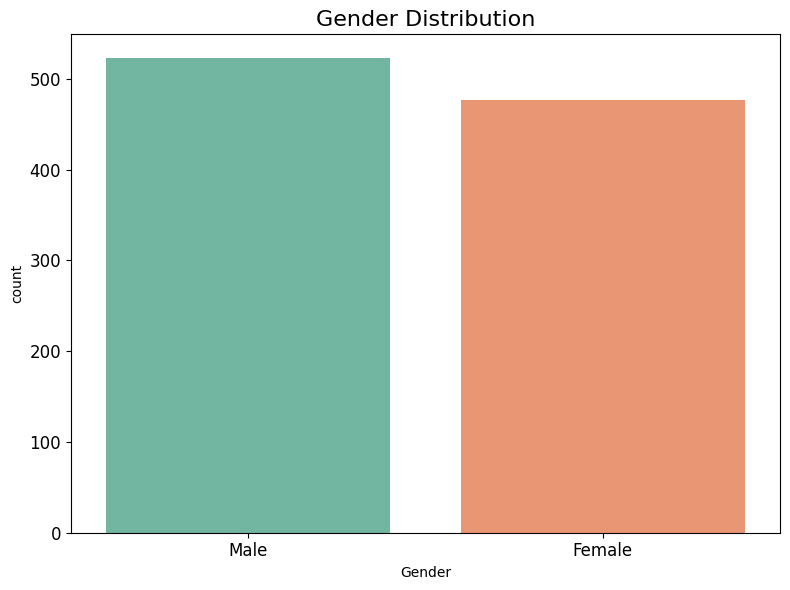

In [12]:
# Gender distribution bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution', fontsize=16)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()




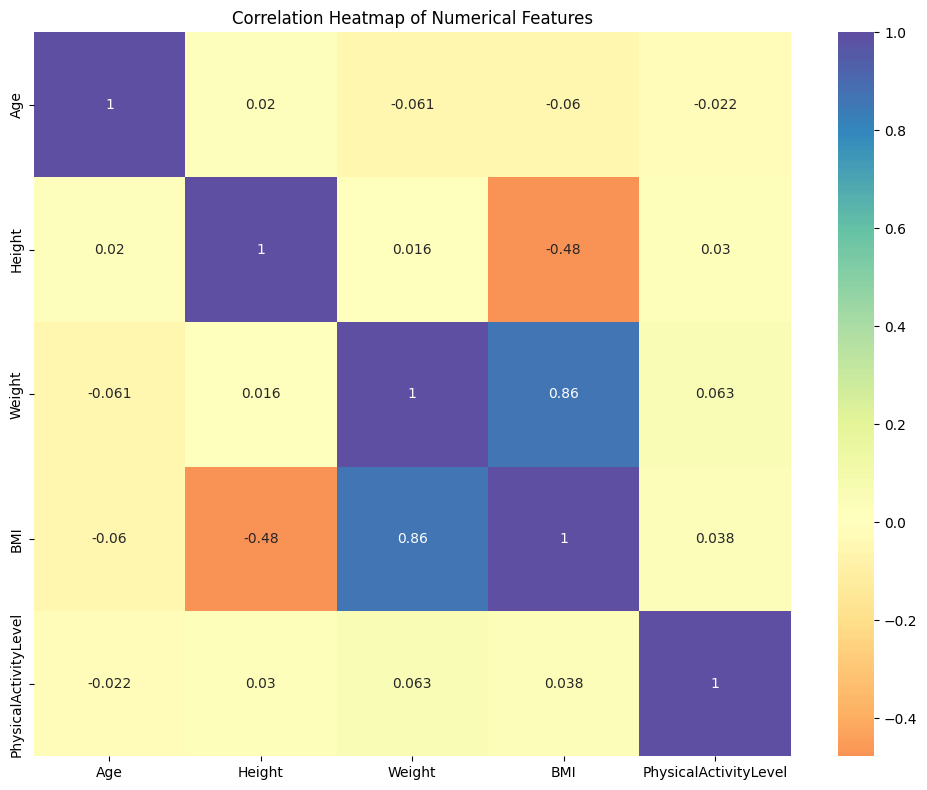

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

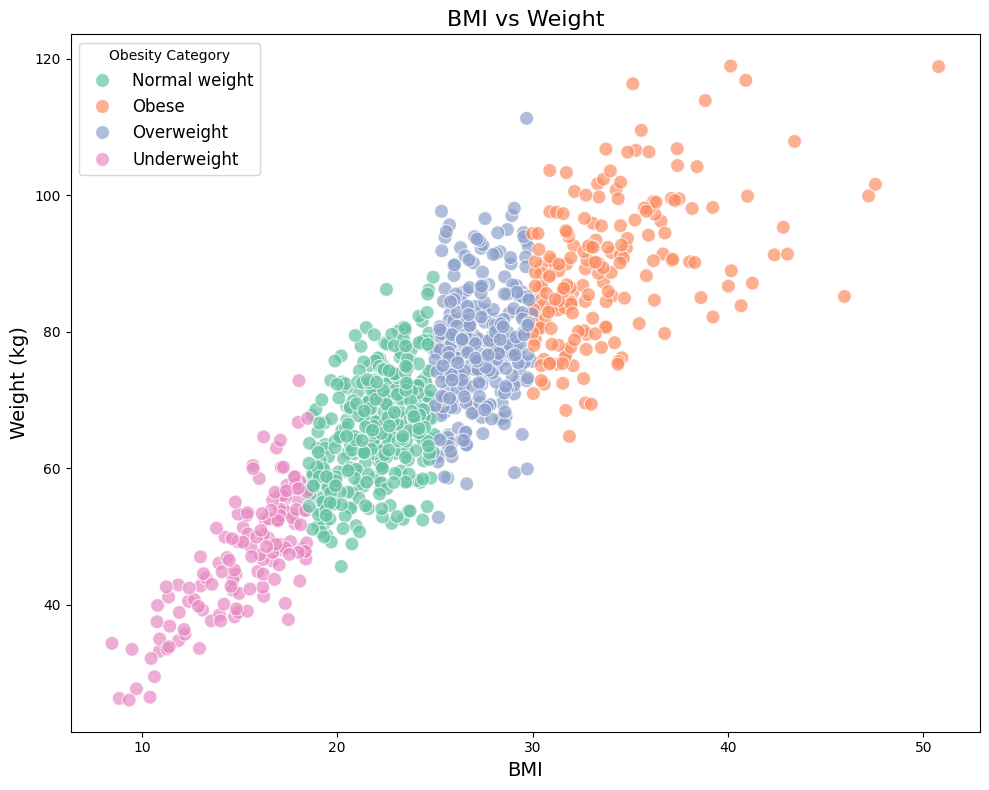

In [14]:
# Scatter plot between BMI and Weight
plt.figure(figsize=(10, 8))
sns.scatterplot(x='BMI', y='Weight', data=df, hue='ObesityCategory', palette='Set2', s=100, alpha=0.7)
plt.title('BMI vs Weight', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)
plt.legend(title='Obesity Category', fontsize=12)
plt.tight_layout()
plt.show()


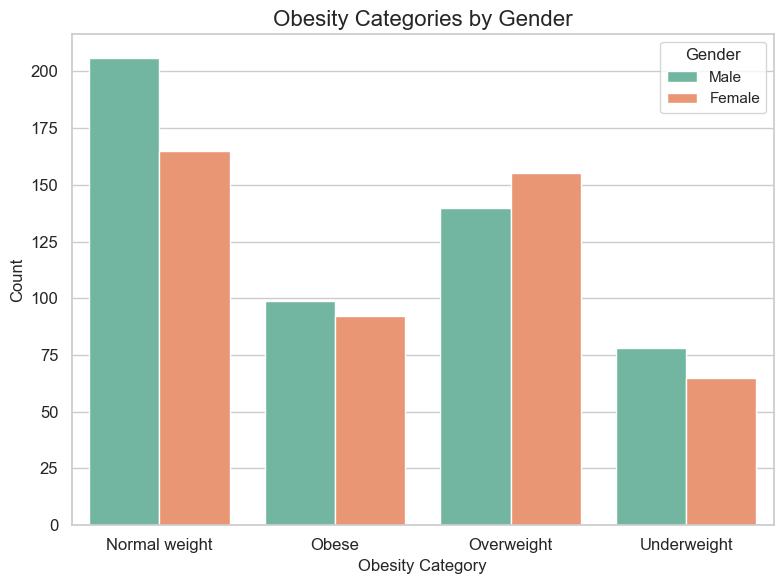

In [15]:
# Set Seaborn style for consistency
sns.set(style="whitegrid")

# Create a count plot to visualize gender against obesity categories
plt.figure(figsize=(8, 6))
sns.countplot(x='ObesityCategory', hue='Gender', data=df, palette='Set2')

# Title and labels
plt.title('Obesity Categories by Gender', fontsize=16)
plt.xlabel('Obesity Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### Preprocessing

In [16]:
# Encode categorical values
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  
df['ObesityCategory'] = label_encoder.fit_transform(df['ObesityCategory'])

In [17]:
df

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,0
1,69,1,164.127306,89.959256,33.395209,2,1
2,46,0,168.072202,72.930629,25.817737,4,2
3,32,1,168.459633,84.886912,29.912247,3,2
4,60,1,183.568568,69.038945,20.487903,3,0
...,...,...,...,...,...,...,...
995,18,1,155.588674,64.103182,26.480345,4,2
996,35,0,165.076490,97.639771,35.830783,1,1
997,49,0,156.570956,78.804284,32.146036,1,1
998,64,1,164.192222,57.978115,21.505965,4,0


### split data

In [18]:
X = df[['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']] 
y = df['ObesityCategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature scaling

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

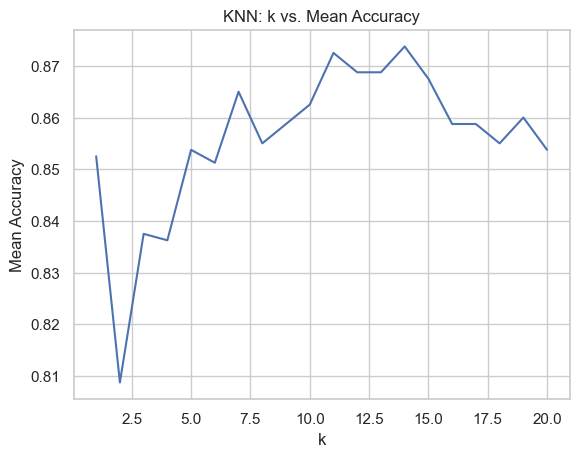

Optimal k: 14


In [20]:
from sklearn.model_selection import cross_val_score

# Range of k values to test
k_values = range(1, 21)

# Store the mean cross-validation scores for each k
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting the relationship between k and cross-validation scores
plt.plot(k_values, cv_scores)
plt.xlabel('k')
plt.ylabel('Mean Accuracy')
plt.title('KNN: k vs. Mean Accuracy')
plt.show()

# Best k
best_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Optimal k: {best_k}")


In [21]:
# KNN model 
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=14)

In [22]:
# Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

### Evaluate models

In [23]:
# Predict using KNN
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of KNN (k=14): {accuracy_knn:.4f}")

print("Confusion Matrix for KNN:")

print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))


Accuracy of KNN (k=14): 0.8700
Confusion Matrix for KNN:
[[68  0  4  0]
 [ 0 28  4  0]
 [ 3  2 60  0]
 [13  0  0 18]]
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        72
           1       0.93      0.88      0.90        32
           2       0.88      0.92      0.90        65
           3       1.00      0.58      0.73        31

    accuracy                           0.87       200
   macro avg       0.91      0.83      0.85       200
weighted avg       0.88      0.87      0.87       200



In [24]:
# Predict using Logistic Regression
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy of Logistic Regression: {accuracy_logreg:.4f}")
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

Accuracy of Logistic Regression: 0.9650
Confusion Matrix for Logistic Regression:
[[70  0  2  0]
 [ 0 30  2  0]
 [ 2  0 63  0]
 [ 1  0  0 30]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       1.00      0.94      0.97        32
           2       0.94      0.97      0.95        65
           3       1.00      0.97      0.98        31

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.97       200
weighted avg       0.97      0.96      0.97       200



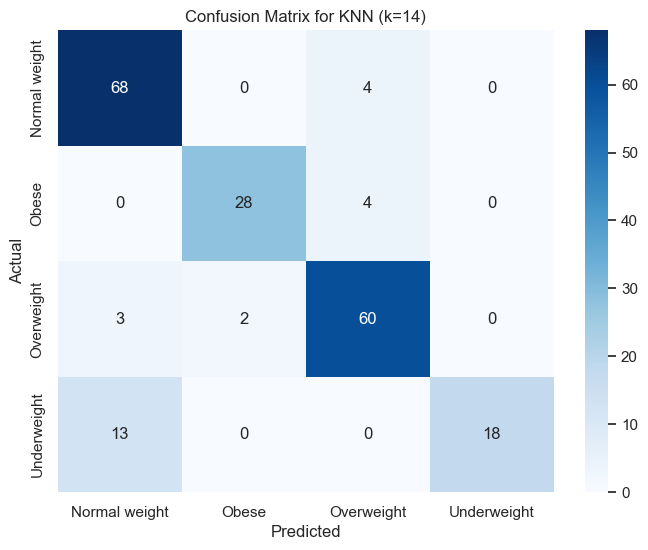

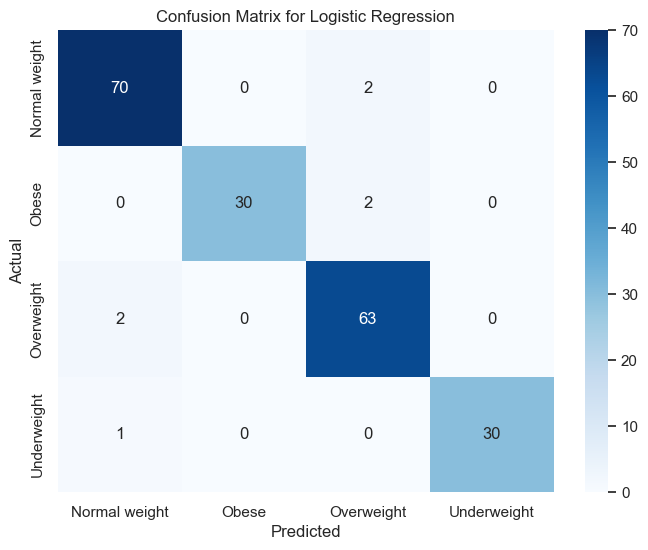

In [25]:
# Confusion Matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for KNN (k=14)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [31]:
df_classification = pd.DataFrame({
    'Actual': y_test,
    'KNN Predicted': y_pred_knn,
    'LogReg Predicted': y_pred_logreg
})

display(df_classification.head(15))

,Actual,KNN Predicted,LogReg Predicted
521,2,2,2
737,2,2,2
740,2,2,2
660,0,0,0
411,2,2,2
678,0,0,0
626,3,3,3
513,0,0,0
859,2,0,2
136,3,3,3


In [27]:
def detailed_model_comparison(y_true, y_pred_knn, y_pred_logreg):
    print("Detailed Model Comparison:\n")
    
    print("KNN Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred_knn):.4f}")
    print(classification_report(y_true, y_pred_knn))
    
    print("\nLogistic Regression Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred_logreg):.4f}")
    print(classification_report(y_true, y_pred_logreg))

detailed_model_comparison(y_test, y_pred_knn, y_pred_logreg)

Detailed Model Comparison:

KNN Performance:
Accuracy: 0.8700
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        72
           1       0.93      0.88      0.90        32
           2       0.88      0.92      0.90        65
           3       1.00      0.58      0.73        31

    accuracy                           0.87       200
   macro avg       0.91      0.83      0.85       200
weighted avg       0.88      0.87      0.87       200


Logistic Regression Performance:
Accuracy: 0.9650
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       1.00      0.94      0.97        32
           2       0.94      0.97      0.95        65
           3       1.00      0.97      0.98        31

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.97       200
weighted avg       0.97      0.96      0.97       200



In [33]:
#suggested: Logistic Regression